In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv(r'C:\kartheek\Krish\notebook\data\stud.csv')

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.shape

(1000, 8)

In [13]:
#missing values
df.isna().sum()
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [ ]:
#Duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

np.int64(0)

In [17]:
#check datatypes
df.info()
df.dtypes
#check no.of unique values in each column
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [18]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [28]:
print("Categories in gender variable: ",end="")
print(df['gender'].unique())
print("Categories in race_ethnicity variable: ",end="")
print(df['race_ethnicity'].unique())
print("Categories in lunch variable: ",end="")
print(df['lunch'].unique())
print("Categories in parental_level_of_education variable: ",end="")
print(df['parental_level_of_education'].unique())
print("Categories in test_preparation_course variable: ",end="")
print(df['test_preparation_course'].unique())




Categories in gender variable: ['female' 'male']
Categories in race_ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in lunch variable: ['standard' 'free/reduced']
Categories in parental_level_of_education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in test_preparation_course variable: ['none' 'completed']


In [31]:
#define numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("we have {} numerical features  {}".format(len(numerical_features),numerical_features))
print("we have {} categorical features  {}".format(len(categorical_features),categorical_features))


we have 3 numerical features  ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [33]:
df['Total_Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = round(df['Total_Score']/3,2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [50]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
print(f"No of students with full marks in reading : {reading_full}")
writing_full = df[df['writing_score'] == 100]['average_score'].count()
print(f"No of students with full marks in reading : {writing_full}")
math_full = df[df['math_score'] == 100]['average_score'].count()
print(f"No of students with full marks in reading : {math_full}")

No of students with full marks in reading : 17
No of students with full marks in reading : 14
No of students with full marks in reading : 7


In [51]:
reading_20 = df[df['reading_score'] <= 20]['average_score'].count()
print(f"No of students with full marks in reading : {reading_20}")
writing_20 = df[df['writing_score'] <= 20]['average_score'].count()
print(f"No of students with full marks in reading : {writing_20}")
math_20 = df[df['math_score'] <= 20]['average_score'].count()
print(f"No of students with full marks in reading : {math_20}")

No of students with full marks in reading : 1
No of students with full marks in reading : 3
No of students with full marks in reading : 4


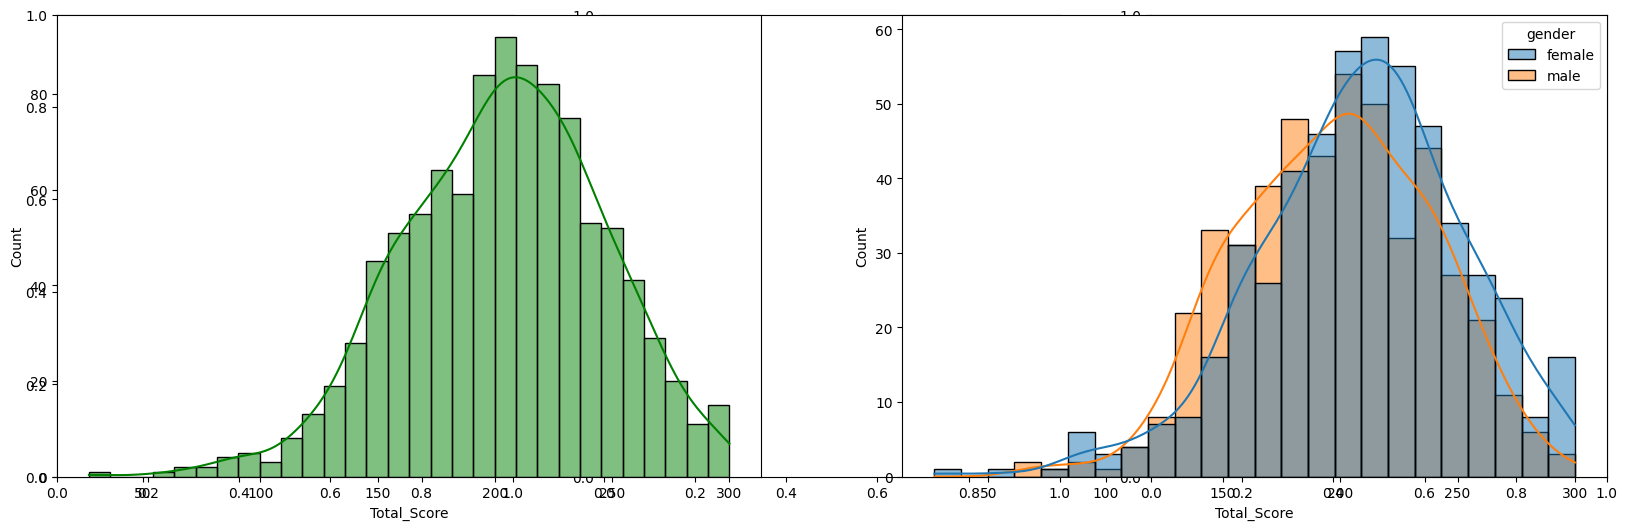

: 

In [ ]:
#Histogram and KDE
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
plt.subplot(121)
sns.histplot(df, x= 'Total_Score', bins = 30, kde=True,color='g')
plt.subplot(122)
sns.histplot(df, x= 'Total_Score', kde=True,hue='gender')
plt.show()